# Introduction to Machine Learning (ML) - part II

by [@barbara_plank](https://twitter.com/barbara_plank)


## Machine learning = learning from data

learning what? 

to make **predictions**

The goal of machine learning is to find a function $f$ that, given some input $x$, produces predictions for that input, $y$.

To visualize the whole:

<img src="pics/learning.png" width=800>

## Overview - What we need

1. Data
  * what your data looks, the input $X$ and output (labels) $Y$ 
2. Features
  * how to represent your data (the actual features): how to decompose $X$ into its parts by $\phi$
3. Model/Algorithm
  * the machine learning algorithm used 
4. Evaluation
  * how to measure how good your model is 

## Classification vs Regression




In **supervised machine learning** the y’s are given, and are called the labels. They can be categorial, like ”sports”, ”news”, etc. or numerical, e.g. 7, 8,10. If the labels are categorical we speak of classification, in case of numerical labels the task is regression.

## Example - first step with scikit-learn :Training a classifier on the IRIS dataset

In this section, we will train a classifier on the [IRIS data set](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html). 

<img src="pics/iris.png" width=300>
This data set about plants is included in sklearn and already ready to use, meaning that features are already extracted for the data instances x, and each training instance has an associated class label y. In the next section we will see how to extract features and use them in sklearn.
The iris data set consists of 150 training instances with 3 classes (setosa,versicolor,virginica). Technically, it is stored as a python dict, thus we can see dict.keys() to inspect what it contains:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()


The iris data set consists of 150 training instances with 3 classes (setosa,versicolor,virginica). Technically, the whole information is stored as a python dictionary, we can see `dict.keys()` to inspect what it contains:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# the possible Y's (labels/categories)
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Looking at the actual label valuess of the IRIS dataset:

In [4]:
import numpy as np
iris_X = iris.data
iris_y = iris.target
## in this example the labels are actually encoded as numbers! 
# NB. sklearn can also directly use labels (as we will see later), but many other ML packages expect labels as numbers
print(np.unique(iris_y))

[0 1 2]


### How do the examples/data instances/cases look like?

Each training instance consists of 4 attributes (thus is 4-dimensional, or a vector with 4 dimensions), in this case numerical measurements. We can get a description using feature_names. For instance, lets look at the first data instance $x_0$:

In [5]:
iris['data'][0]

array([ 5.1,  3.5,  1.4,  0.2])

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<img src="http://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png" width=400>

The class labels y for the instances are actually stored in iris[’target’] as integers (indices corresponding to the respective target_names entry). Thus, the first instances is of type setosa:

In [7]:
iris['target'][0]

0

## Training 


Now we are ready to train a classifier on 80% of the data, and evaluate on the remaining 20%. We will train both a k-nearest neighbor classifier as well as logistic regression model, and evaluate both

In [9]:
#!/usr/bin/python
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 3 classes, 150 instances: X=iris[’data’]  y=iris[’target’]
iris = datasets.load_iris()
# create random permutation with seed (uncomment to get fixed set)
#np.random.seed(1253)
indices = np.random.permutation(len(iris['data']))
# split in 80% train, 20% test - NB: in a real setup we would split off a separate dev/development set and keep test for the end
len_test = int(len(iris['data'])*0.2)
# train part (all except test part)
X_train = iris['data'][indices[:-len_test]]
y_train = iris['target'][indices[:-len_test]]

# test part
X_test = iris['data'][indices[-len_test:]]
y_test = iris['target'][indices[-len_test:]]

# output statistics
print("#inst train: %s" % (len(X_train)))
print("#inst test: %s" % (len(X_test)))
# learn classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf)
y_pred= clf.predict(X_test)
print("Pred:", y_pred)
print("Gold:", y_test)
# get accuracy
print(classification_report(y_test, y_pred, target_names=iris['target_names']))
print(confusion_matrix(y_test, y_pred))

#inst train: 120
#inst test: 30
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Pred: [2 1 0 0 2 0 2 2 0 2 1 1 2 2 1 0 1 2 2 1 1 0 0 0 2 0 0 2 0 1]
Gold: [2 1 0 0 2 0 1 2 0 2 1 1 2 2 1 0 1 2 2 1 1 0 0 0 2 0 0 2 0 1]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      0.89      0.94         9
  virginica       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


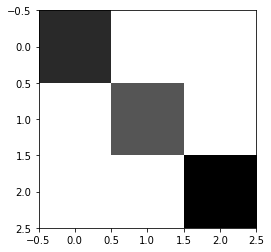

In [31]:
% matplotlib inline
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [10]:
## an alternative
import pandas as pd
def crosstab(pred, gold):
    y_true = pd.Series(gold)
    y_pred = pd.Series(pred)
    print(pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
crosstab(y_test, y_pred)

Predicted   0  1   2  All
True                     
0          11  0   0   11
1           0  8   0    8
2           0  1  10   11
All        11  9  10   30


## Label encoding

Notice that in the example above the labels were encoded as numbers. However, we could also use the names directly. 

There is a class in sklearn that maps between labels and numbers, the `LabelEncoder`. Have a look at it!

In [34]:
import numpy as np
data_y = np.array([iris['target_names'][index] for index in iris['target']])
data_y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## Exercises:

* Modify the example above so that it used the named labels directly.
* Use the K-nearest neighbor classifier for the Iris dataset. Compare its performance to logistic regression.
* (Advanced): Use the `DictVectorizer` to represent the input data, i.e., convert each features to a dictionary key-value pair and use the `DictVectorizer` to convert it then to the input the classifier uses.

## Features, and feature templates

In NLP, we typically have a *lot* of features (not just the 4 we saw in the IRIS example). Typically, we work with entire *vocabularies*. When we speak of a *feature* in NLP we typically mean a *feature template* (which gets instantiated to a set of values). For example, when we say we use unigrams (single words) as feature, this is actually a feature template that gets instantiated. Or when we say we use POS tags. Internally, these every value of a feature template is mapped to a unique feature (feature id), and if this feature is 'on' (or active), we'll see a 1 in the place of the vector that represents this features (e.g. POS tag is "DET").

You can imagine that every instance is represented as a long vector (a high-dimensional vector; each dimension is a features). If you have 10000 features, you can imagine a vector of 10000 length, or 1000 dimensions. For every feature that is active for a given example, you turn the vector dimension 'on' (save it as a 1). 

Now in practice, we won't work with superlong vectors. They are becoming easily too big to process. Why?

Read 'bag of words' of the tutorial: [http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) 

* features, feature templates
* sparse representations

Sklearn is handling the data in sparse format for you. You don't need to worry about it!

## Example 2: Sentiment Classification

Go to the folder 'exercise'. Retrieve the code. Go through the code with your neighbor. Fill
out the blanks. Make sure you understand all parts of the code. 

## Recap: Machine Learning

For you there to read, a more formal view.

### Input and output
 
The goal of supervised machine learning is to find a function $h$ that maps from some percept or input $x$ to a label $y$. What $x$ and $y$ are depends on the task. Many banks, for instance, use a learned function to decide whether to give credit to a customer or not. Here, $x$ is the credit application and $y$ is the outcome: approved or declined. In NLP, $x$ could be a tweet and $y$ could be its sentiment, or $x$ could be a sentence and $y$ is syntactic parse tree; and so forth. Let $x \in \mathcal{X}$ (input space) and $y \in \mathcal{Y}$ (label space).

NLP applications almost always have **discrete** output spaces. In these lectures $y$ will either be an integer (for classification) or a vector of integers (for structured prediction). 

### Target and hypothesis function

We’ll make the assumption that there exists an **unknown target function** which is solving the problem we’re interested in:

$$f: \mathcal{X} \mapsto \mathcal{Y}$$

This, of course, is a bit of a fiction. It doesn’t really exist anywhere, but it’s a useful fiction because it allows us to describe the goal, which is to learn a **hypothesis function** $h$ that is as close as possible to the target function. Naturally, the hypothesis function performs the same mapping as the unknown target function:

$$h: \mathcal{X} \mapsto \mathcal{Y}$$

### Dataset 

It gets worse before it gets better. Not only is our target function unknown, we also don’t know the true distribution of our inputs $P(x)$. We don’t know which tweets will be written or the kinds of backgrounds people who apply for credit will have.   

Supervised learning rests on the idea that we can get a limited number of examples (i.e. **a sample**) 

$$x_1, \ldots, x_n \sim P(x)$$

from the unknown input distribution $P(x)$, and that we (somehow) can evaluate on the unknown target function $f$ on these examples. 

Putting this together yields the concept of a **training set**:

$$\mathcal{D}_t = \{(x_1, f(x_1) ), \ldots (x_n, f(x_n)) \}$$

How do we gain access to the unknown target function? The bank might look at past credit applications together with the decisions. In NLP we often ask *people* to annotate.

#### Unsupervised and semi-supervised learning

It’s easy to imagine a situation where we could arrange to get a large sample of data from $P(x)$ without labels being included in the deal. The setting in which there are no labels at all is called **unsupervised learning**. When unlabeled data is available in addition to a labeled dataset this is **semi-supervised learning**. 

### Feature representation

We’ll never have to read the same Twitter message twice, hopefully. By the time a failed credit application is resubmitted, the customer’s circumstances are likely different, and so the  application isn’t the same anymore. “You cannot submit a credit application twice,” as Heraclitus might have said. 

This poses a problem in that we wish to learn from the past, but whatever happened in the past it will not happen *exactly* like that again. Instead something *similar* might happen. So we need a way to break up our observations (the $x$es) to make them comparable even if the don’t match exactly. 

Luckily, our observations are typically not unique snowflakes, but can decomposed into **features** in some **feature space** $\mathcal{F}$. Even though the learner might not have seen the new example exactly, it might have seen similar examples (or parts of the current example), and thus still be able to make a prediction.

Specifically, each input example is transformed into a suitable **input representation** for the learning algorithm by a **feature function** $\phi(x)$. The feature function $\phi(\cdot)$ maps examples from the input space to the feature space:

$$\phi: \mathcal{X} \rightarrow \mathcal{F}$$

Typically, the $\phi(x)$ is a real-valued vector of some fixed dimension $d$, i.e. 

$$\mathcal{F} = \mathbb{R}^d$$

Note that the $\phi$ feature function is deterministic and not a part of the learner. Traditionally, a large body of work in NLP focused on finding better ways to map from input to feature representations for specific tasks by hand. 


# References

* [sklearn: Working with text data](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)